In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
#file = open('../dec2020Traces.dat', 'r')  
file = open('../jan2021Traces.dat', 'r')

pmt0 = [[], []]
pmt1 = [[], []]
pmt2 = [[], []]
spmt = [[], []]
ssdpmt = [[], []]

#0863 1222 1219 1211 1740 1743 1221 1223 1217 1747 1741 1745 1818 1851 1729 1735 1746 1819 1791

stId = "1791"

st = 0

for line in file:
    rl = line.rstrip('\n').split(' ')
    if rl[0] == "#":
        if len(rl) == 5:
            if rl[4] == stId:
                st = 1
            else:
                st = 0
    if rl[0] != "#" and st == 1:
        pmt0[0].append(int(rl[1]))
        pmt0[1].append(int(rl[2]))
        pmt1[0].append(int(rl[3]))
        pmt1[1].append(int(rl[4]))
        pmt2[0].append(int(rl[5]))
        pmt2[1].append(int(rl[6]))
        spmt[0].append(int(rl[7]))
        spmt[1].append(int(rl[8]))
        ssdpmt[0].append(int(rl[9]))
        ssdpmt[1].append(int(rl[10]))
        
        
pmt0 = np.array(pmt0)
pmt1 = np.array(pmt1)
pmt2 = np.array(pmt2)
spmt = np.array(spmt)
ssdpmt = np.array(ssdpmt)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

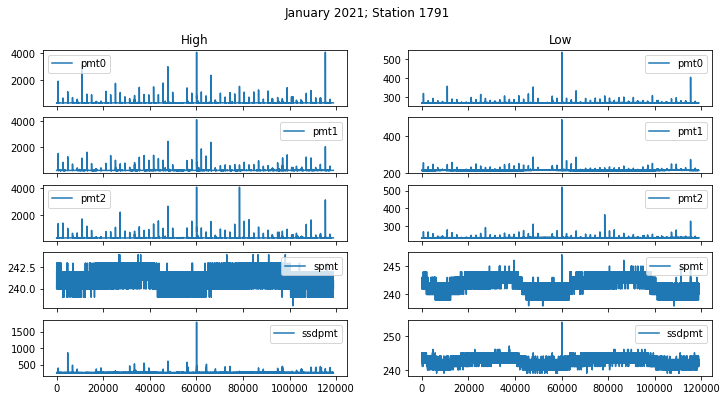

In [40]:
fig, axs = plt.subplots(5, 2, sharex=True, figsize=(12, 6))
fig.suptitle('January 2021; Station '+stId)

axs[0, 0].plot(pmt0[0], label="pmt0")
axs[0, 0].legend()
axs[0, 1].plot(pmt0[1], label="pmt0")
axs[0, 1].legend()
axs[1, 0].plot(pmt1[0], label="pmt1")
axs[1, 0].legend()
axs[1, 1].plot(pmt1[1], label="pmt1")
axs[1, 1].legend()
axs[2, 0].plot(pmt2[0], label="pmt2")
axs[2, 0].legend()
axs[2, 1].plot(pmt2[1], label="pmt2")
axs[2, 1].legend()

axs[3, 0].plot(spmt[0], label="spmt")
axs[3, 0].legend()
axs[3, 1].plot(spmt[1], label="spmt")
axs[3, 1].legend()
axs[4, 0].plot(ssdpmt[0], label="ssdpmt")
axs[4, 0].legend()
axs[4, 1].plot(ssdpmt[1], label="ssdpmt")
axs[4, 1].legend()

axs[0, 0].set_title("High")
axs[0, 1].set_title("Low")



plt.savefig('../plots/jan2021/'+stId+'_traces.eps', dpi=150)

plt.show()

# Charge and Peak

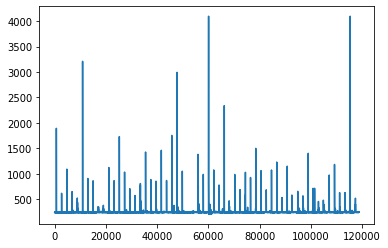

In [41]:
plt.plot(pmt0[0], label="pmt0")

plt.show()

## For Low

In [42]:
cn = 0

pmt0bl = []
pmt1bl = []
pmt2bl = []
spmtbl = []
ssdpmtbl = []

pmt0ch = []
pmt1ch = []
pmt2ch = []
spmtch = []
ssdpmtch = []

pmt0pk = []
pmt1pk = []
pmt2pk = []
spmtpk = []
ssdpmtpk = []

tmpbl = 0
tmpch = 0
tmppk = 0


for i in pmt0[0]:
    if cn < 500:
        tmpbl += i
    else:
        tmpch += i - tmpbl/500.
        if i > tmppk:
            tmppk = i        
    cn += 1        
        
    if cn == 2047:
        cn = 0
        pmt0bl.append(tmpbl/500.)
        pmt0ch.append(tmpch)
        pmt0pk.append(tmppk)
        
        tmpbl = 0
        tmpch = 0
        tmppk = 0

tmpch = 0
tmpbl = 0         
        
pmt0bl = np.array(pmt0bl)
pmt0ch = np.array(pmt0ch)
pmt0pk = np.array(pmt0pk)

print("Mean:", np.mean(pmt0bl))

Mean: 243.09624137931033


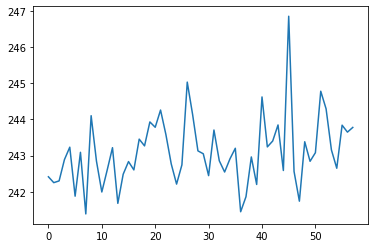

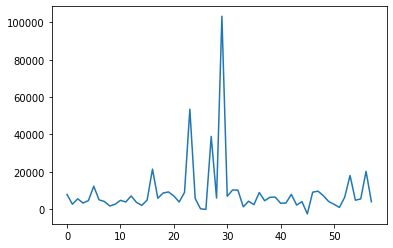

In [45]:
plt.plot(pmt0bl)
plt.show()

plt.plot(pmt0ch)
plt.show()

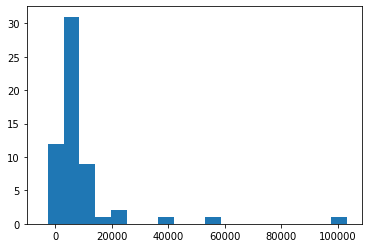

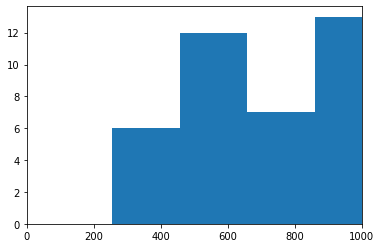

In [46]:
xbin = np.linspace(np.amin(pmt0ch), np.amax(pmt0ch), 20)

plt.hist(pmt0ch, bins = xbin)
#plt.plot(pmt0ch)
plt.xlim(-10000,)

plt.show()

xbin = np.linspace(np.amin(pmt0pk), np.amax(pmt0pk), 20)
plt.hist(pmt0pk, bins = xbin)

plt.xlim(0,1000)

plt.show()